In [16]:
from __future__ import division, print_function
from itertools import product as cproduct
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import networkx as nx
import numpy as np
import sys
%matplotlib notebook

sys.path.append('/Users/rkp/Dropbox/Repositories/be_more_spontaneous')
sys.path.append('/Users/rkp/Dropbox/Repositories/reusable')
from figure_magic import axis_tools
from jupyter_netviz import animation

import metrics
import network
import network_param_gen

In [17]:
N_NODES = 50
W_STRONG = 2
P_CXN = .05
GAIN = 20

DURATION = 200

In [18]:
cxn_mask = np.random.rand(N_NODES, N_NODES) < P_CXN
weights = np.zeros((N_NODES, N_NODES), dtype=float)
weights[cxn_mask] = W_STRONG
np.fill_diagonal(weights, 0)

In [19]:
ntwk = network.RecurrentSoftMaxModel(
    weights=weights, gain=GAIN,
)
ntwk.store_voltages = True

paths, probs = metrics.most_probable_paths(weights, GAIN, length=3, n=10)

In [20]:
for _ in range(DURATION):
    ntwk.step()

In [21]:
rates, reordering = metrics.reorder_by_paths(np.array(ntwk.rs_history), paths)

<IPython.core.display.Javascript object>


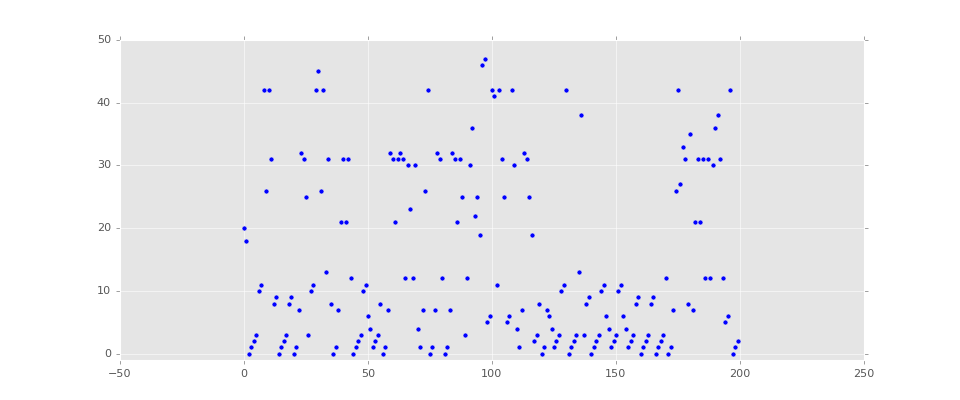

(-1, 50)

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(rates.nonzero()[0], rates.nonzero()[1])
ax.set_ylim(-1, N_NODES)

In [23]:
weights = weights[:, reordering]
weights = weights[reordering, :]
paths, probs = metrics.most_probable_paths(weights, GAIN, length=3, n=20)
paths

[(0, 1, 2, 3),
 (4, 1, 2, 3),
 (5, 6, 4, 1),
 (6, 4, 1, 7),
 (6, 4, 1, 2),
 (8, 9, 0, 1),
 (2, 3, 10, 11),
 (1, 2, 3, 8),
 (1, 2, 3, 10),
 (1, 2, 3, 12),
 (1, 2, 3, 13),
 (1, 7, 5, 6),
 (1, 7, 21, 31),
 (1, 7, 26, 42),
 (1, 7, 32, 31),
 (9, 0, 1, 7),
 (9, 0, 1, 2),
 (21, 31, 32, 31),
 (21, 31, 21, 31),
 (3, 10, 11, 6)]

In [24]:
# new network with same connectivity but relabeled nodes
ntwk = network.RecurrentSoftMaxModel(
    weights=weights, gain=GAIN,
)
ntwk.store_voltages = True

In [25]:
# run network by driving the first element of its most probable paths
drives = []
for path in paths[:20]:
    for repeat in range(4):
        for step in range(4):
            drive = np.zeros((N_NODES,), dtype=float)
            if step == 0:
                drive[path[0]] = 20
            ntwk.step(drive)
            drives.append(drive)

In [26]:
rates = np.array(ntwk.rs_history)
drives = np.array(drives)

<IPython.core.display.Javascript object>


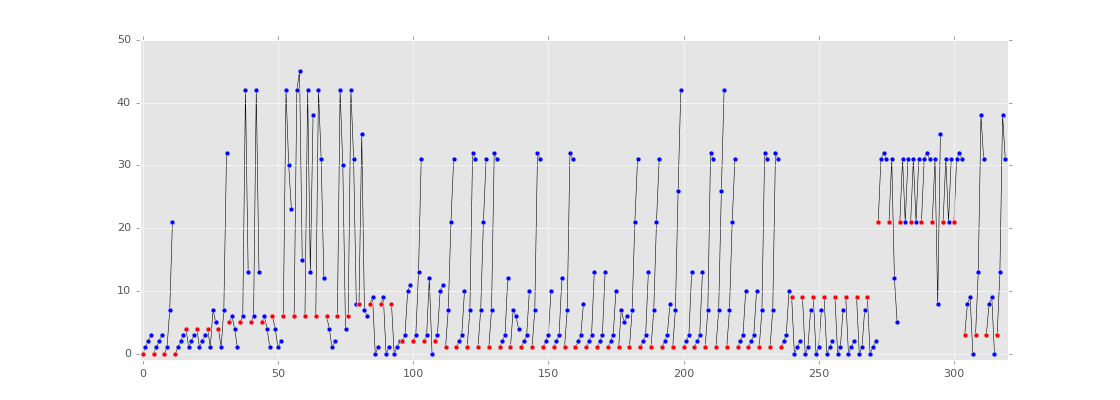

(-1, 50)

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.scatter(rates.nonzero()[0], rates.nonzero()[1])
ax.scatter(drives.nonzero()[0], drives.nonzero()[1], c='r')
for line_ctr in range(0, len(rates), 4):
    ax.plot(
        rates.nonzero()[0][line_ctr:line_ctr+4], rates.nonzero()[1][line_ctr:line_ctr+4],
        color='k', lw=.5, zorder=-1
    )
ax.set_xlim(-1, len(drives))
ax.set_ylim(-1, N_NODES)

In [28]:
node_0, node_1 = metrics.first_node_pair_non_overlapping_path_tree(range(N_NODES), weights, 3, allow_path_loops=False)
print(node_0, node_1)

9 27


In [29]:
metrics.paths_of_length(weights, 3, start=node_0)

[(9, 0, 1, 2), (9, 0, 1, 7)]

In [30]:
metrics.paths_of_length(weights, 3, start=node_1)

[(27, 33, 3, 8),
 (27, 33, 3, 10),
 (27, 33, 3, 12),
 (27, 33, 3, 13),
 (27, 33, 31, 8),
 (27, 33, 31, 12),
 (27, 33, 31, 21),
 (27, 33, 31, 25),
 (27, 33, 31, 32),
 (27, 33, 41, 11)]